 <center> <h1> Modélisation prédictive </h1> </br> <h2> Présentation et utilisation <h2> </center>

<center><img src=" 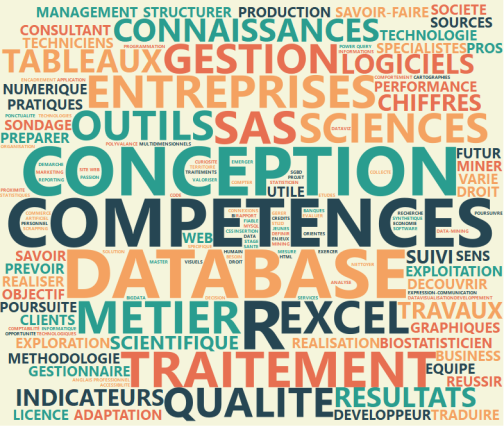"/></center>

## Qu'est ce que la modélisation prédictive ?

___

L'analyse prédictive est une méthode qui permet d'interpréter les données actuelles et anciennes afin de faire des prévisions sur les événements à venir. Elle donne ainsi lieu à des pronostics devant toutefois être considérés comme des probabilités et non comme des prédictions certaines.

Par exemple, dans la partie "Qu'est ce qu'une donnée ?", à partir d'une base de données contenant quelques informations (poils, dents, nombre de pattes, etc...) sur des animaux, on essaye de deviner si, à partir des données connues sur l'animal, il peut être dangereux pour l'homme ou non.

Le but de ce notebook est de vous guider dans la réalisation d'une méthode Modélisation prédictive, sur un jeu de données concret.


## Quand l'utiliser ?

___

On utilise la modélisation prédictive lorsque l'on a déjà des données sur **ce qui s'est passé** dans le passé mais que l'on veut les utiliser pour essayer de prédire **ce qui va se passer**.


#### Exemple : 

Dans votre boîte mail, c'est la modélisation prédictive qui, en fonction des informations du mail (heure, objet, destinataire,  et surtout contenu du mail) définie un probabilité qu'un mail soit un spam. Si la probabilité est supérieur à un certain seuil, la mail sera envoyé dans vos spams. Tout cela est fait à partir d'un précédente base de données contenant des spams et des non-spams.


![title]( 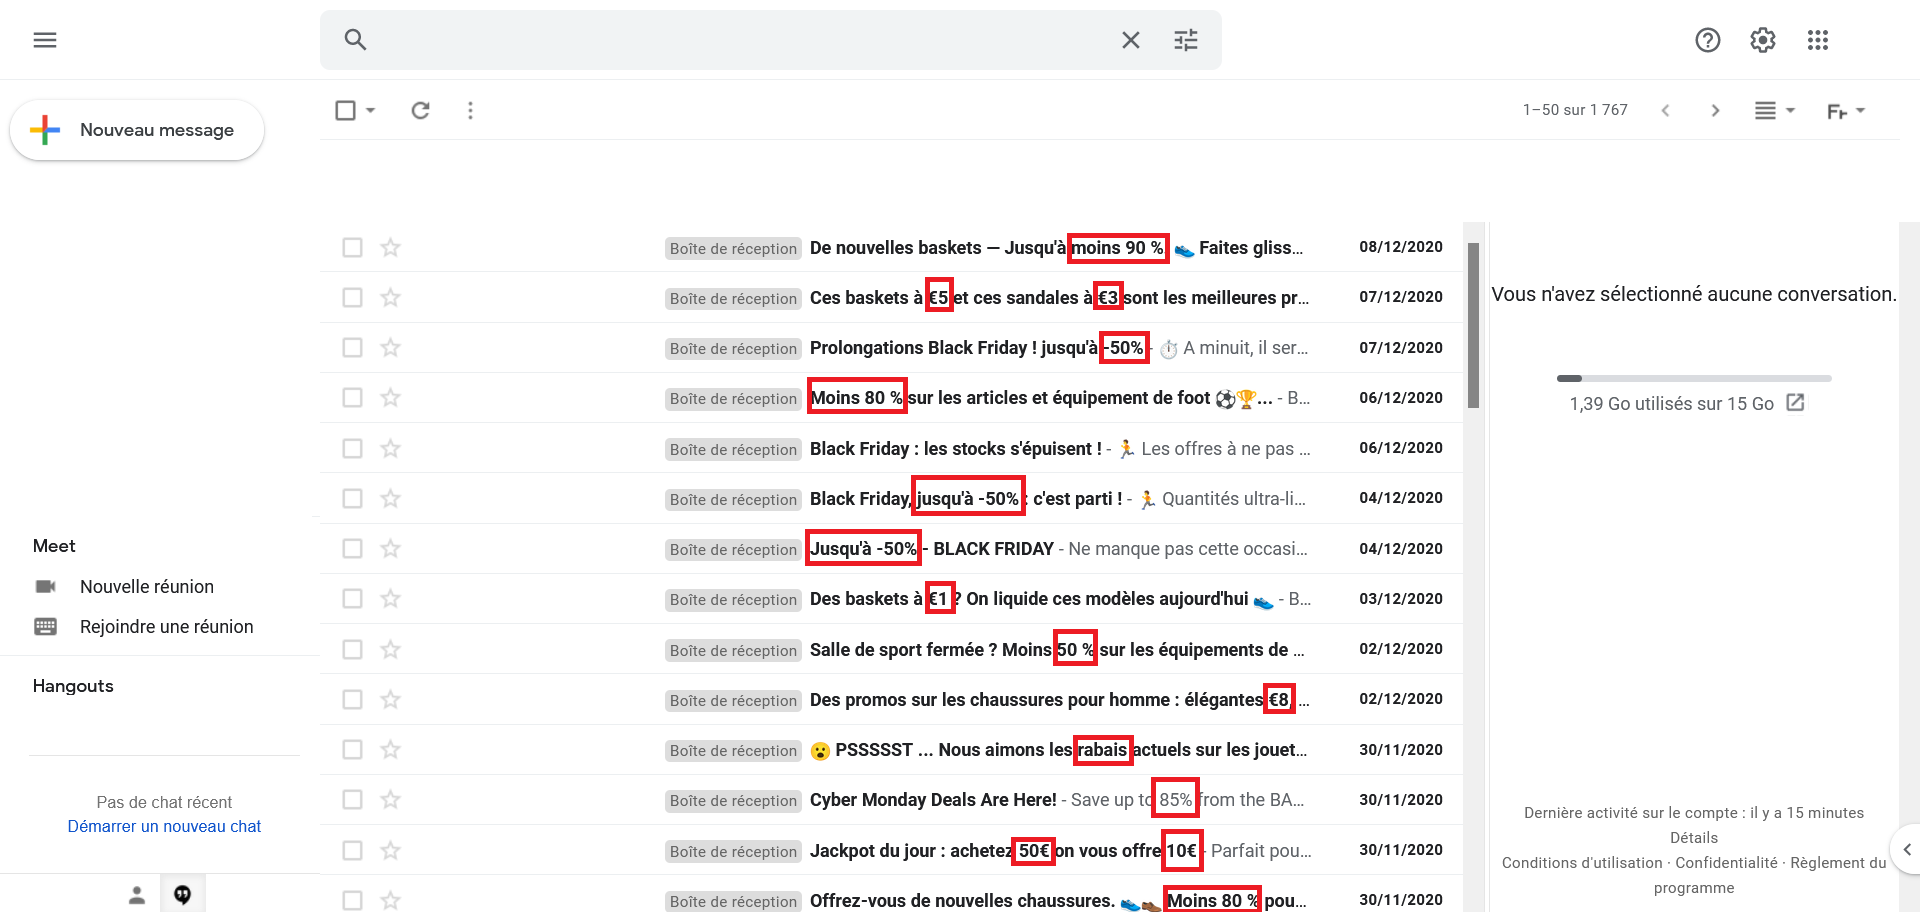)
<center> Figure 1 : spam dans une boite mail et éléments pouvant guider vers la reconnaissance de spams </center>

## Comment l'utiliser ?

___

### Choisir son modèle

Selon le type de la variable à prédire, on peut utiliser différents modèles. Seules les 2 modèles les plus connus seront abordées, ce ne sont pas les seules, vous pourrez retrouver une liste ici.

#### Le modèle de régression linéaire

Si la variable que vous souhaitez prédire est quantitative (taille à l'age adulte d'un être vivant, prix d'un appartement, nombre de visites dans un magasin), on va utiliser un **modèle de régression linéaire**.

Imaginez avoir ces données sur les prix des albums de musique dans une médiathéque :

|album|nombre_de_titres_album|prix_album_en_euros|
|-----|----------------------|-------------------|
|1    |                     8|                 20|
|2    |                     7|                 18|
|3    |                     5|                 15|
|4    |                    13|                 30|
|5    |                    10|                 25|


Si on les place sur un graphique, on obtient ça : 

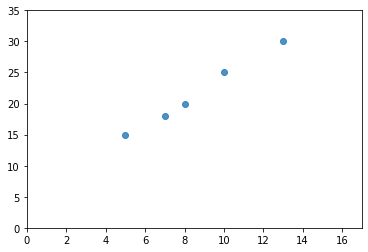

In [2]:
nombre_de_titres_album =  [8,7,5,13,10] 
prix_album_en_euros =  [20,18,15,30,25]

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

sns.regplot(x=nombre_de_titres_album, y=prix_album_en_euros, fit_reg=False)
ax.set_ylim(0,35)
ax.set_xlim(0,17)

plt.show()

On a très envie de tracer une droite entre les points, similaire à celle-ci :

![reg]( 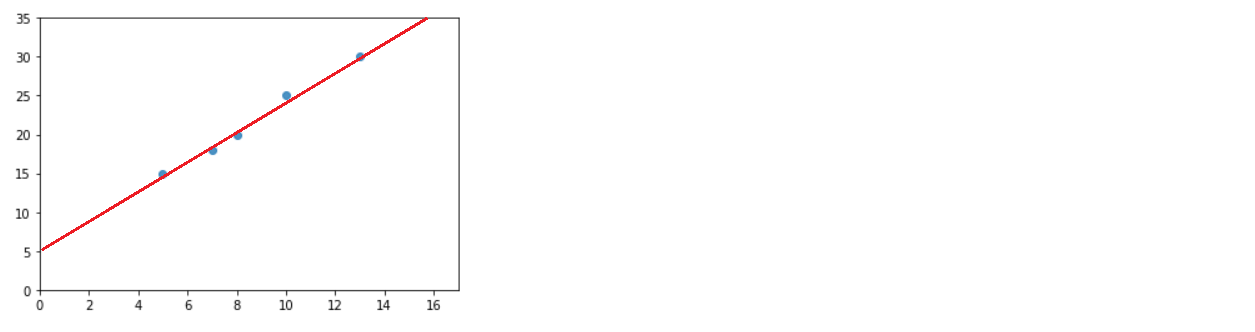)

Ici, on voit très vite que, sur notre droite, un album avec 12 titres vaudrait approximativement 28 euros. C'est le principe de la régression linéaire, qui va utiliser cette méthode de manière bien plus poussée, avec plus de variables.

![reg]( 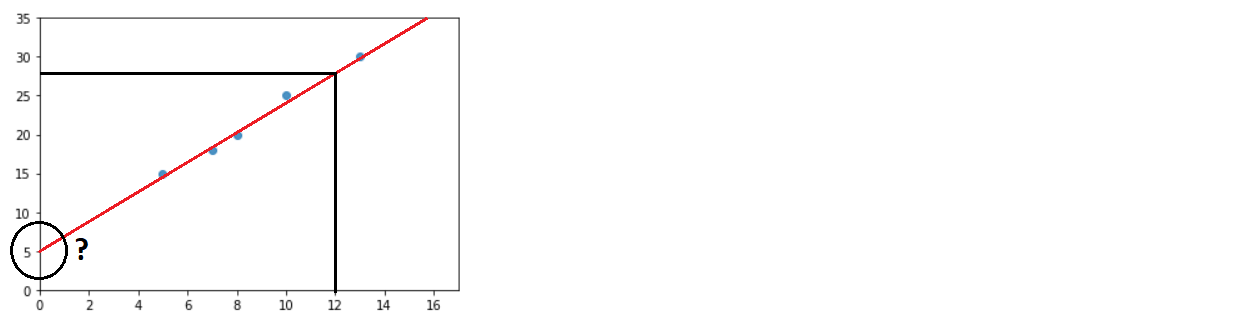)

Cette méthode a des limites, car un album sans titre, ne pouvant pas exister, ne vaudrait pas 5€ ! On ne peut donc pas estimer des valeurs extrêmes par rapport aux données qu'on dispose.

#### Le modèle de régression logistique

Si la variable que vous souhaitez prédire est qualitative binaire (gagner/perdre, monter/descendre, oui/non), on va utiliser un **modèle de régression logistique**.

Dans ce cas, on va se baser sur des probabilités. Par exemple : la probabilité de gagner. Elles ne peuvent cependant pas être modélisées par une fonction affine, car elle admet des valeurs négatives et/ou supérieures à l'unité, ce qui n'est pas compatible avec la définition d'une probabilité (qui doit être entre 0 et 1). On va donc la représenter à l'aide de la fonction logistique, qui n'admet des valeurs qu'entre 0 et 1 :

<center><img src=" 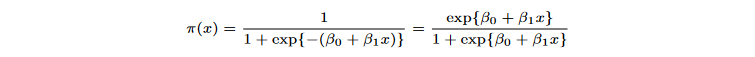"/></center>

et va être représentée par cette courbe : 

<center><img src=" 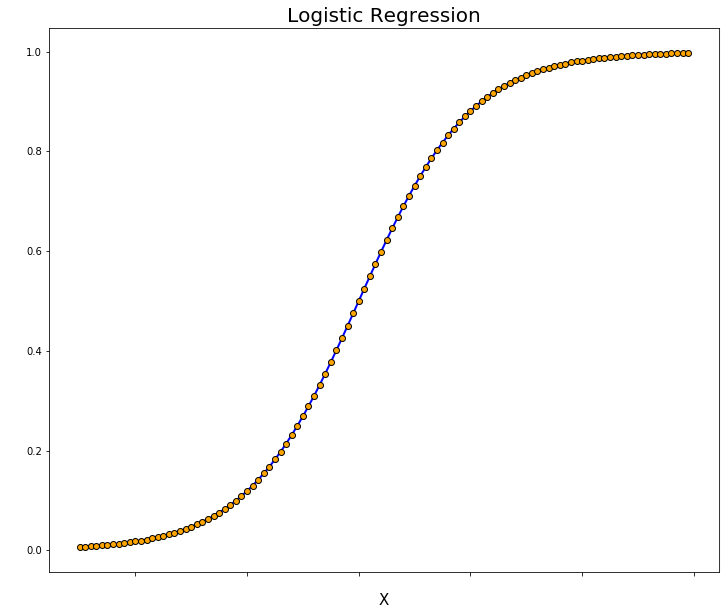" ></center>

## Mise en pratique

___

Pour la suite ce tutoriel, on étudiera des sms pour repérer lesquels d'entre eux sont des spam commerciaux et/ou arnaque, grâce à la régression logistique. Pour cela, on se base sur  **[ce fichier de données](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)**, contenant plus de 5000 sms divers (en anglais), déjà définis comme spams ou non-spams.


### Les prérequis

In [2]:
pip install Pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


### Importation des données

On importe notre jeu de données issus de 

In [5]:
import pandas as pd

df = pd.read_csv('Data/spam.csv', encoding = "ISO-8859-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1341,ham,Just chill for another 6hrs. If you could slee...,NaN,NaN,NaN
1113,ham,"No I'm good for the movie, is it ok if I leave...",NaN,NaN,NaN
2583,ham,"Goodmorning, today i am late for 1hr.",NaN,NaN,NaN
4910,ham,Love that holiday Monday feeling even if I hav...,NaN,NaN,NaN
4214,ham,No dear i was sleeping :-P,NaN,NaN,NaN


On vérifie qu'il n'y a pas de valeurs manquantes.

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Les 3 dernières colonnes sont remplies de valeurs manquantes, on les supprime.

In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
3554,spam,From next month get upto 50% More Calls 4 Ur s...
769,ham,Lol I know! They're so dramatic. Schools alrea...
4040,spam,Please call our customer service representativ...
2243,ham,Boo I'm on my way to my moms. She's making tor...
5482,spam,URGENT We are trying to contact you Last weeke...


On renomme les colonnes utiles.

In [8]:
df.rename(columns={'v1':'nature','v2':'texte'},inplace=True)
df.sample(5)

,nature,texte
1861,ham,Aiyah then i wait lor. Then u entertain me. He...
4093,ham,how are you? I miss you!
3303,ham,IM GONNAMISSU SO MUCH!!I WOULD SAY IL SEND U A...
237,ham,Where are you?when wil you reach here?
1788,ham,Arun can u transfr me d amt


On affecte à la nature (spam ou ham) les valeurs 0 et 1 afin d'établir une régression logisitique.

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['nature'] = encoder.fit_transform(df['nature'])
df.sample(5)

,nature,texte
3470,0,Heart is empty without love.. Mind is empty wi...
1677,0,Lol where do u come up with these ideas?
1483,0,Purity of friendship between two is not about ...
4981,0,Slept? I thinkThis time ( &lt;#&gt; pm) is no...
1150,0,(That said can you text him one more time?)


Le texte doit être mis en minuscule, dans le but de repérer des mots précis. Sans cela, si l'on veut repérer "free", on devrait indiquer "FREE","Free" et "free".

In [10]:
df['texte'] = df['texte'].str.lower()

### Choisir ses variables

On va ensuite choisir les indicateurs pour repérer les spams. Ici, on va essayer de prédire si le mail reçu est un spam au travers de la présence de chiffres, du mot "free", du mot "offer", de la présence de "xx" et de "lol".

In [11]:
df['chiffre'] = df["texte"].str.count('[0-9]')
df['free'] = df["texte"].str.count("free")
df['offer'] = df["texte"].str.count("offer")
df['xx'] = df["texte"].str.count("xx")
df['interrogation'] = df["texte"].str.count("\\?")
df.sample(5)

,nature,texte,chiffre,free,offer,xx,interrogation
2810,0,thinkin about someone is all good. no drugs fo...,0,0,0,0,0
2166,0,"thank you. and by the way, i just lost.",0,0,0,0,0
4458,1,welcome to uk-mobile-date this msg is free giv...,19,2,0,0,0
3314,1,free message activate your 500 free text messa...,14,3,0,0,0
868,1,hello. we need some posh birds and chaps to us...,0,0,0,0,1


Le tableau ci-dessous va nous permettre de vérifier si toutes nos variables ont réelement un impact sur notre modèle. On va se repérer à la valeur présente dans la colonne "P>|z|", aussi appelée **p-value**, qui doit être inférieur à 5% (0.05) pour définir qu'une variable est réelement impactante.

In [12]:
from statsmodels.formula.api import logit

fit_logit = logit("nature ~ chiffre + free + offer + xx + interrogation ", df).fit()
print(fit_logit.summary())

Optimization terminated successfully.
         Current function value: 0.090300
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 nature   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5566
Method:                           MLE   Df Model:                            5
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.7708
Time:                        11:38:57   Log-Likelihood:                -503.15
converged:                       True   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.3463      0.128    -34.024      0.000      -4.597      -4.096
chiffre           0.

Comme vous pouvez le voir, la variable "interrogation" est égale à 0.109 soit 10%. On va donc considérer qu'elle n'est pas significative en présence des autres variables, on va la supprimer de notre modèle.

In [13]:
fit_logit = logit("nature ~ chiffre + free + offer + xx ", df).fit()
print(fit_logit.summary())

Optimization terminated successfully.
         Current function value: 0.090557
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 nature   No. Observations:                 5572
Model:                          Logit   Df Residuals:                     5567
Method:                           MLE   Df Model:                            4
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.7702
Time:                        11:38:57   Log-Likelihood:                -504.58
converged:                       True   LL-Null:                       -2195.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4108      0.124    -35.708      0.000      -4.653      -4.169
chiffre        0.6359      0.

Toutes les valeurs dans la colonne "P>|z|" sont inférieures à 5%, on peut donc utiliser ce modèle.

### Jeu d'entraînement et jeu de test

Pour faire notre modélisation prédictive, on va devoir entraîner notre modèle. On va ensuite le tester sur des nouvelles données afin d'en établir le taux de bonnes réponses. Il est important de créer un jeu de données spécialement pour essayer notre modèle , car il est trop facile pour un modèle de reconnaître quelque chose qu'il connaît déjà. Imaginez faire une évaluation de Mathématiques avec exactement les mêmes exercices que dans le cours, ce serait bien plus facile !

Ne pouvant pas avoir des données en plus, on va donc créer un jeu de test et notre jeu d'entraînement directement à partir de nos données importées. Le jeu d'entraînement sera composé de 80% des données et le jeu de test 20%. 

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = 27)

On vérifie que les variables sont bien significatives en présences des autres, c'est-à-dire quand la valeur indiquée dans "P>|z|" est inférieur à 0,05.

In [15]:
fit_logit_train = logit("nature ~ chiffre + free + offer + xx", train).fit()
print(fit_logit_train.summary())

Optimization terminated successfully.
         Current function value: 0.090261
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 nature   No. Observations:                 4457
Model:                          Logit   Df Residuals:                     4452
Method:                           MLE   Df Model:                            4
Date:                Thu, 05 May 2022   Pseudo R-squ.:                  0.7688
Time:                        11:38:57   Log-Likelihood:                -402.30
converged:                       True   LL-Null:                       -1740.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.3950      0.137    -32.100      0.000      -4.663      -4.127
chiffre        0.6208      0.

On va ensuite appliquer notre modèle sur notre jeu de test et définir qu'un SPAM sera considéré comme SPAM si la probabilité définie par notre modèle que le mail soit SPAM est supérieure à 50%, cela peut paraître logique, mais il existe des différences subtiles qu'on ne détaillera pas ici.

In [16]:
train_pred = fit_logit_train.predict(test)

In [17]:
import numpy as np

def convert_prob_to_label(prob, cutoff = 0.5):
    label = None
    if prob > cutoff:
        label = 1
    else:
        label = 0
    return label

pred_labels = list(map(convert_prob_to_label, train_pred))
pred_labels = np.asarray(pred_labels)

## Comment évaluer son modèle ?

___

Une **matrice de confusion** permet de vérifier comment ont été prédit nos messages. 

In [18]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test.nature, pred_labels)

print("               ","SPAM | HAM")
print("Considéré SPAM"," ",conf_matrix[[0],[0]].flat[0]," ",conf_matrix[[0],[1]].flat[0],'\n',"Considéré HAM"," ",conf_matrix[[1],[0]].flat[0]," ",conf_matrix[[1],[1]].flat[0])


                SPAM | HAM
Considéré SPAM   949   8 
 Considéré HAM   26   132


Sur la matrice de confusion, les bonnes réponses sont les spams considérés comme SPAM et les hams considérés comme HAM, c'est-à-dire la diagonale qui part d'en haut à gauche. Notre taux de bonne réponse est donc la somme des diagonales (949 + 132) divisée par l'ensemble des réponses (949 + 132 + 8 + 26), c'est-à-dire :

In [19]:
bonne_rep = (conf_matrix[[0],[0]].flat[0] + conf_matrix[[1],[1]].flat[0])/len(test)

print("Pourcentage de bonnes réponses :", round(bonne_rep*100,3) , "%")
print("Pourcentage d'erreur :", round(100-bonne_rep*100,3) , "%")

Pourcentage de bonnes réponses : 96.951 %
Pourcentage d'erreur : 3.049 %


Il est important d'afficher le taux d'erreur. Imaginez un indicateur 1 à 98% de bonnes réponses et un indicateur 2 à 94% : les résultats semblent proches, mais le taux d'erreur est 3 fois plus élevé pour l'indicateur 2 (6%), que pour l'indicateur 1 (2%). 

Un deuxième indicateur utilisable à partir de la matrice de confusion est la sensibilité, c'est-à-dire la capacité de notre modèle à définir les spams comme étant SPAM. Au tribunal, cela reviendrait à la capacité de repérer qu'un coupable est bien un coupable, pour ne pas mettre un innocent en prison. Il se calcule en divisant le nombre de spams considérés HAM par le nombre de spams totaux.

In [20]:
faux_negatifs = (conf_matrix[[1],[0]].flat[0])/(conf_matrix[[0],[0]].flat[0] + conf_matrix[[0],[1]].flat[0])

print("Sensibilité :", round(100-faux_negatifs*100,3) , "%")
print("Pourcentage de faux négatifs :", round(faux_negatifs*100,3) , "%")

Sensibilité : 97.283 %
Pourcentage de faux negatifs : 2.717 %


Un troisième indicateur utilisable à partir de la matrice de confusion est la spécificité, c'est-à-dire la capacité de notre modèle à définir ce qui n'est pas un spam comme quelque chose qui n'est pas SPAM (soit HAM, ici). Au tribunal, cela reviendrait à la capacité de repérer qu'un innocent est bien un innocent, pour ne pas relâcher un coupable. Il se calcule en divisant le nombre de hams considérés SPAM par le nombre de hams totaux.

In [21]:
faux_positifs = (conf_matrix[[0],[1]].flat[0])/(conf_matrix[[1],[0]].flat[0] + conf_matrix[[1],[1]].flat[0])

print("Spécificité :", round(100-faux_positifs*100,3) , "%")
print("Pourcentage de faux positifs :", round(faux_positifs*100,3) , "%")

Spécificité : 94.937 %
Pourcentage de faux positifs: 5.063 %


Pour un même taux de bonne réponse, l'augmentation du taux d'un des deux autres indicateurs va  amener à la réduction de l'autre. La préférence entre sensibilité et spécificité va surtout dépendre du cas dans lequel vous vous trouvez, par exemple : 

- pour un test COVID, on préfère dire à un patient négatif qu'il est positif, plutôt que de dire à un patient infecté qu'il est négatif et qu'il propage le virus sans le savoir. On va donc préférer augmenter la spécificité.


- pour un contrôle qualité de produits industriels, on préfère définir un lot de produit de bonne qualité en lot de mauvaise qualité, quit à le jeter pour rien, que de définir un lot de mauvaise qualité comme de bonne qualité, et envoyer un mauvais lot au client. On va donc préférer augmenter la sensibilité.